# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("Dataset_inisiasi.csv")
df.head()

,Date,Fulfilment,SKU,ASIN,Courier Status,Qty,Amount,B2B,Amount_scaled,Category_Bottom,...,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Cluster,PCA1,PCA2
0,2022-04-30,Merchant,JNE3781-KR-XXXL,B09K3WFS32,Shipped,1,406.0,False,-0.884741,False,...,True,False,False,False,False,False,False,2,-218.977633,1.218870
1,2022-04-30,Amazon,JNE3371-KR-XL,B07WV4JV4D,Shipped,1,329.0,True,-1.195850,False,...,False,False,False,False,False,False,False,2,-295.978222,-0.494451
2,2022-04-30,Amazon,JNE3671-TU-XXXL,B098714BZP,Shipped,1,574.0,False,-0.205958,False,...,False,False,False,False,False,False,False,3,-50.975504,-0.499005
3,2022-04-30,Amazon,SET264-KR-NP-XL,B08YN7XDSG,Shipped,1,824.0,False,0.804135,False,...,False,False,False,False,False,False,False,0,199.027326,-0.507543
4,2022-04-30,Amazon,J0095-SET-L,B08CMHNWBN,Shipped,1,653.0,False,0.113231,False,...,False,False,False,False,False,False,False,0,28.026140,-0.500428


In [3]:
df.drop(columns=["Date", "SKU", "ASIN"], inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom kategorikal
categorical_cols = ["Fulfilment", "Courier Status"]
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
print(df.dtypes)

Fulfilment                                int32
Courier Status                            int32
Qty                                       int64
Amount                                  float64
B2B                                        bool
Amount_scaled                           float64
Category_Bottom                            bool
Category_Dupatta                           bool
Category_Ethnic Dress                      bool
Category_Saree                             bool
Category_Set                               bool
Category_Top                               bool
Category_Western Dress                     bool
Category_kurta                             bool
Size_4XL                                   bool
Size_5XL                                   bool
Size_6XL                                   bool
Size_Free                                  bool
Size_L                                     bool
Size_M                                     bool
Size_S                                  

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
X = df.drop(columns=["Cluster", "PCA1", "PCA2"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (89991, 35)
Ukuran X_test: (22498, 35)
Ukuran y_train: (89991,)
Ukuran y_test: (22498,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# 1. Membangun Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Membangun Model SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

print("Model Random Forest dan SVM berhasil dilatih")

Model Random Forest dan SVM berhasil dilatih


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**Random Forest** adalah algoritma ensemble yang membangun banyak Decision Tree dan menggabungkan prediksinya untuk meningkatkan akurasi serta mengurangi overfitting, sehingga cocok untuk dataset dengan banyak fitur.

**SVM** bekerja dengan mencari hyperplane terbaik yang memisahkan kelas dengan margin terbesar, menggunakan teknik kernel trick untuk menangani data yang tidak terpisah secara linear.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

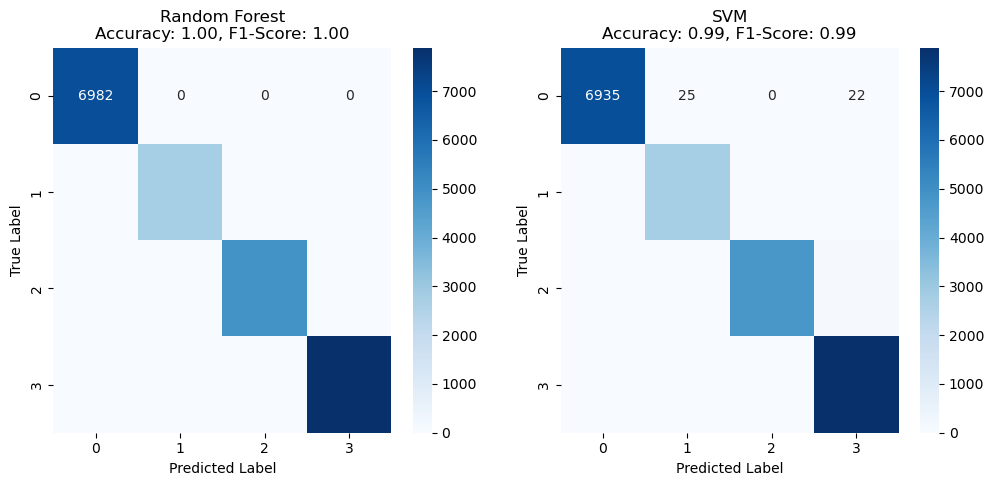

=== Classification Report Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6982
           1       1.00      1.00      1.00      2749
           2       1.00      1.00      1.00      4878
           3       1.00      1.00      1.00      7889

    accuracy                           1.00     22498
   macro avg       1.00      1.00      1.00     22498
weighted avg       1.00      1.00      1.00     22498


=== Classification Report SVM ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6982
           1       0.99      1.00      1.00      2749
           2       1.00      0.98      0.99      4878
           3       0.98      1.00      0.99      7889

    accuracy                           0.99     22498
   macro avg       0.99      0.99      0.99     22498
weighted avg       0.99      0.99      0.99     22498



In [8]:
# 1. Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# 2. Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# 3. Menampilkan confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Random Forest\nAccuracy: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'SVM\nAccuracy: {accuracy_svm:.2f}, F1-Score: {f1_svm:.2f}')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

# 4. Menampilkan laporan klasifikasi
print("=== Classification Report Random Forest ===")
print(classification_report(y_test, y_pred_rf))

print("\n=== Classification Report SVM ===")
print(classification_report(y_test, y_pred_svm))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan hasil evaluasi, model **Random Forest** menunjukkan performa yang sangat baik dengan **akurasi dan F1-score sempurna (1.00) pada semua kelas**, menandakan model mampu mengklasifikasikan data dengan sangat akurat.

Model **SVM** juga memiliki performa yang sangat tinggi dengan **akurasi 0.99**, tetapi terdapat sedikit perbedaan dalam recall pada beberapa kelas, khususnya kelas **2**, yang memiliki recall **0.98**. Ini menunjukkan bahwa ada beberapa sampel dari kelas ini yang salah diklasifikasikan ke kelas lain.

Secara keseluruhan, kedua model menunjukkan hasil yang sangat baik, namun **Random Forest** memiliki keunggulan dalam konsistensi performa di semua kelas.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Analisis Hasil Evaluasi Model Klasifikasi**lasifikasi**  

### **Identifikasi Kelemahan Model**  
- **Precision dan Recall**:  
  - Model **Random Forest** memiliki precision dan recall sempurna (1.00) untuk semua kelas.  
  - Model **SVM** memiliki recall **0.98 pada kelas 2**, yang menunjukkan sedikit kesulitan dalam mengklasifikasikan beberapa sampel dari kelas tersebut.  

- **Overfitting atau Underfitting**:  
  - Tidak ada indikasi overfitting atau underfitting karena metrik evaluasi sangat tinggi di seluruh kelas.  
  - Namun, hasil yang terlalu sempurna bisa mengindikasikan **potensi kebocoran informasi dalam data**.  

### **Rekomendasi Tindakan Lanjutan**  
- Melakukan **tuning hyperparameter** untuk memastikan model sudah optimal.  
- Memeriksa kembali preprocessing data untuk **menghindari kebocoran informasi** yang bisa menyebabkan hasil terlalu tinggi.  
- Mencoba algoritma lain seperti **XGBoost atau Gradient Boosting** untuk melihat apakah ada peningkatan atau perbedaan performa.  
- Mengumpulkan lebih banyak data atau memperkenalkan sedikit **noise** untuk menguji ketahanan model terhadap variasi data di dunia nyata.  

---

Struktur ini lebih terpisah dan jelas. 🚀unia nyata.